# Importing Required Libraries

In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [51]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [52]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [53]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [54]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [55]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

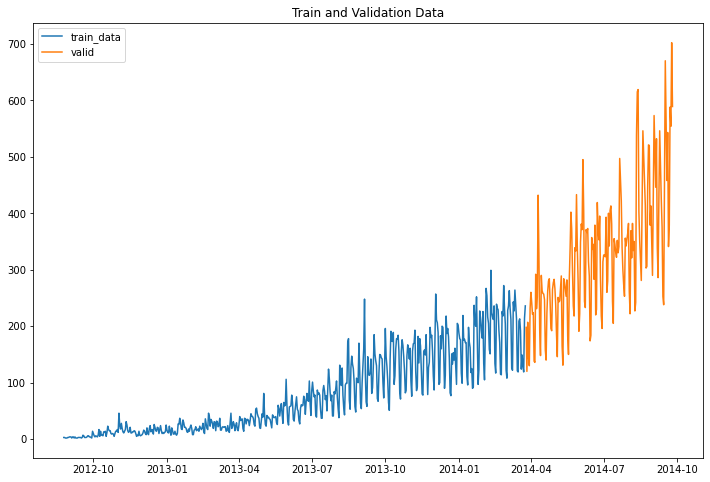

In [56]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

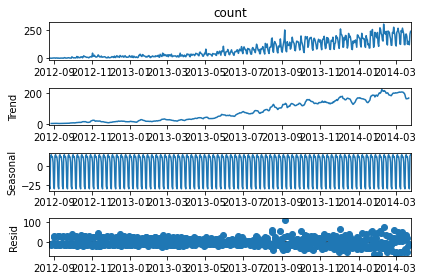

In [148]:
results = seasonal_decompose(df['count'])
results.plot();

In [111]:
from statsmodels.tsa.api import ExponentialSmoothing

In [112]:
model = ExponentialSmoothing(np.asarray(train_data['count']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.1, smoothing_seasonal=0.8) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [113]:
model.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.8,
 'damping_trend': nan,
 'initial_level': 1.755244535665066,
 'initial_trend': -0.6314597913996801,
 'initial_seasons': array([1.56667902, 1.6218904 , 0.86905797, 2.2359754 , 1.55169057,
        1.22440601, 0.87785596]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

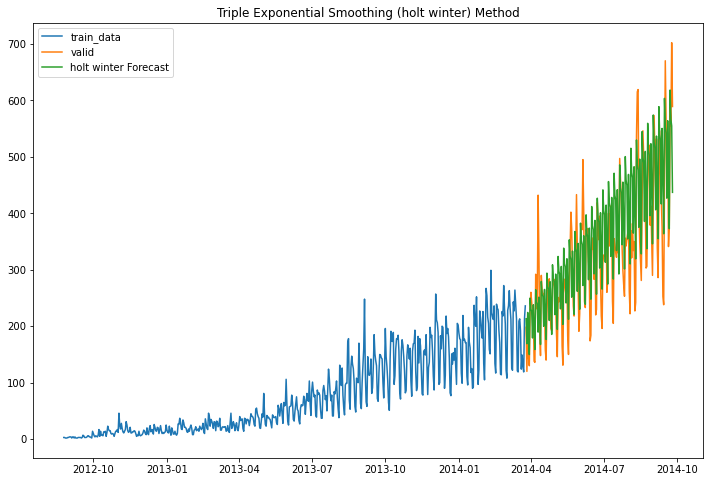

In [114]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [115]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 78.59684424893284


# Stationarity Test

In [ ]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [58]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [59]:
adf_test(train_data['count'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.056611
p-value                          0.953592
#Lags Used                      19.000000
Number of Observations Used    558.000000
Critical Value (1%)             -3.442124
Critical Value (5%)             -2.866734
Critical Value (10%)            -2.569536
dtype: float64


 If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). **Here test statistic is > than critical. Hence series is not stationary**

In [60]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [61]:
kpss_test(train_data['count'])

Results of KPSS Test:
Test Statistic            3.528422
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).  **Here test statistic is > than critical. Hence series is not stationary**

Alternatively, we can use the p-value to make the inference. If p-value is less than 0.05, we can reject the null hypothesis. And say that the series is not stationary.

# Making Series Stationary

In [62]:
train_data['count_diff'] = train_data['count'] - train_data['count'].shift(1)

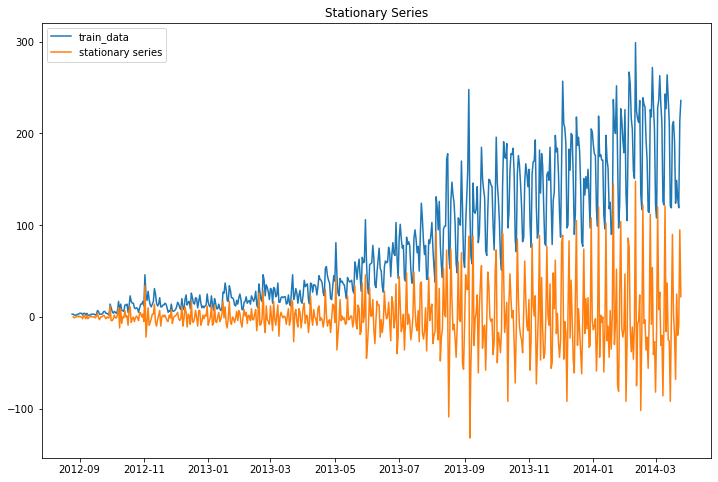

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(train_data.index,train_data['count_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [64]:
train_data['count_log'] = np.log(train_data['count'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(1)

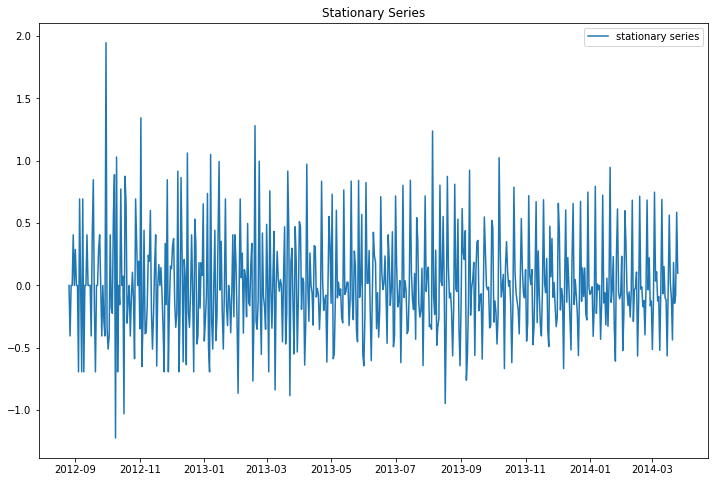

In [65]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [66]:
adf_test(train_data['count_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.500565e+00
p-value                        4.264600e-11
#Lags Used                     1.900000e+01
Number of Observations Used    5.570000e+02
Critical Value (1%)           -3.442145e+00
Critical Value (5%)           -2.866743e+00
Critical Value (10%)          -2.569541e+00
dtype: float64


In [84]:
kpss_test(train_data['count_log_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.110212
p-value                   0.100000
Lags Used                57.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


# SARIMA

In [85]:
from statsmodels.tsa.statespace import sarimax

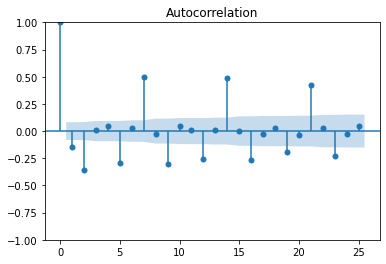

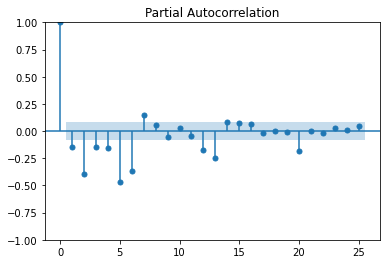

In [86]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [87]:
train_data['count_log'] = np.log(train_data['count'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(7)

In [88]:
train_data['count_log_diff'].head(10)

Date
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
2012-08-30         NaN
2012-08-31         NaN
2012-09-01    0.287682
2012-09-02    0.287682
2012-09-03    0.693147
Name: count_log_diff, dtype: float64

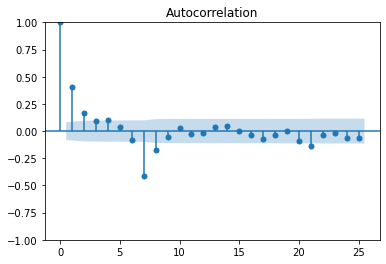

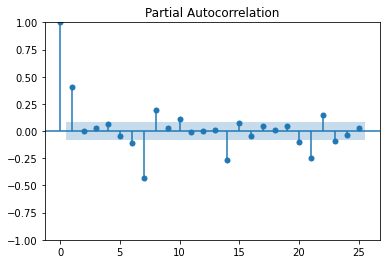

In [89]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [90]:
# fit model
model = sarimax.SARIMAX(train_data['count_log'], seasonal_order=(1,1,1,7), order=(2,1,2))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="2014-02-09", end="2014-09-25", dynamic=True)

In [91]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

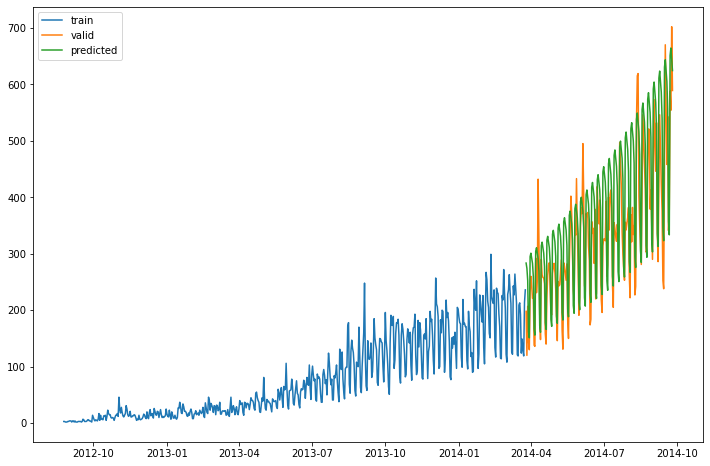

In [92]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['SARIMA'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [93]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 78.9664046303094


# Prophet

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [117]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [118]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [119]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

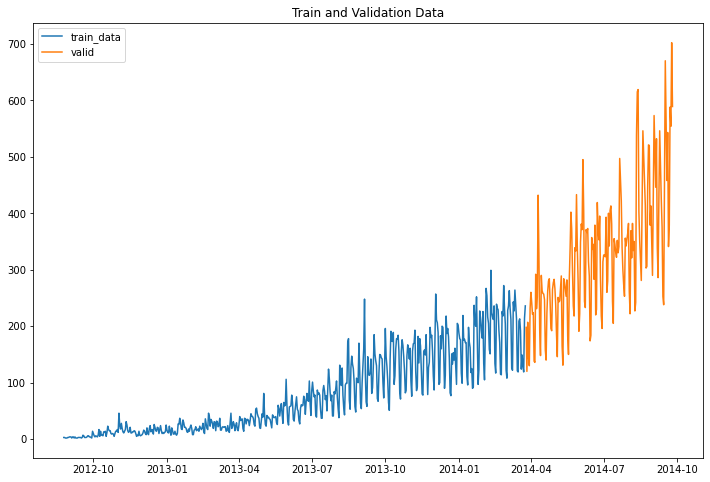

In [120]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

In [121]:
from prophet import Prophet

In [122]:
train_data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [123]:
df = train_data[['Date', 'count']]

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [124]:
df.head()

,ds,y
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


02:05:04 - cmdstanpy - INFO - Chain [1] start processing
02:05:04 - cmdstanpy - INFO - Chain [1] done processing


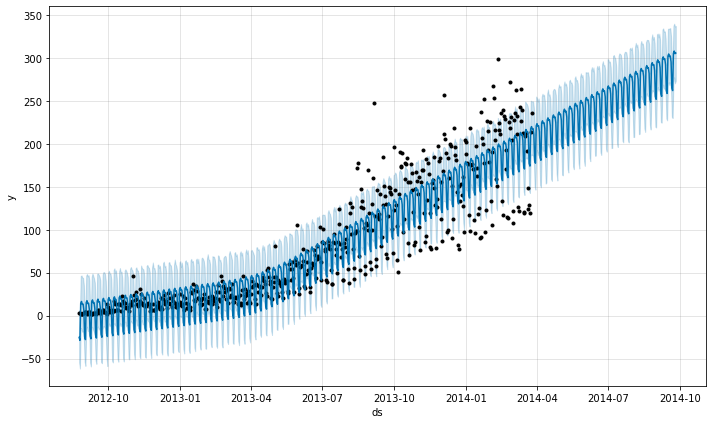

In [125]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=184,freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

In [126]:
train_data.shape, valid_data.shape

((578, 2), (184, 4))

In [127]:
len(forecast['yhat'][578:].values)

184

In [128]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,0.944735,-54.603310,6.323227,0.944735,0.944735,-26.333835,-26.333835,-26.333835,-26.333835,-26.333835,-26.333835,0.0,0.0,0.0,-25.389100
1,2012-08-26,1.073492,-61.677860,1.654975,1.073492,1.073492,-29.904732,-29.904732,-29.904732,-29.904732,-29.904732,-29.904732,0.0,0.0,0.0,-28.831239
2,2012-08-27,1.202249,-14.492111,46.084020,1.202249,1.202249,13.161595,13.161595,13.161595,13.161595,13.161595,13.161595,0.0,0.0,0.0,14.363845
3,2012-08-28,1.331007,-15.875802,46.791500,1.331007,1.331007,15.116394,15.116394,15.116394,15.116394,15.116394,15.116394,0.0,0.0,0.0,16.447400
4,2012-08-29,1.459764,-18.942181,44.287185,1.459764,1.459764,11.597275,11.597275,11.597275,11.597275,11.597275,11.597275,0.0,0.0,0.0,13.057038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2014-09-21,291.983112,230.130632,293.087950,283.675892,299.826699,-29.904732,-29.904732,-29.904732,-29.904732,-29.904732,-29.904732,0.0,0.0,0.0,262.078380
758,2014-09-22,292.466359,272.242029,337.424541,284.047395,300.361792,13.161595,13.161595,13.161595,13.161595,13.161595,13.161595,0.0,0.0,0.0,305.627954
759,2014-09-23,292.949605,277.566143,340.020146,284.391089,300.901218,15.116394,15.116394,15.116394,15.116394,15.116394,15.116394,0.0,0.0,0.0,308.065999
760,2014-09-24,293.432852,270.479179,336.717304,284.743767,301.439636,11.597275,11.597275,11.597275,11.597275,11.597275,11.597275,0.0,0.0,0.0,305.030127


In [129]:
valid_data['prophet'] =  forecast['yhat'][578:].values

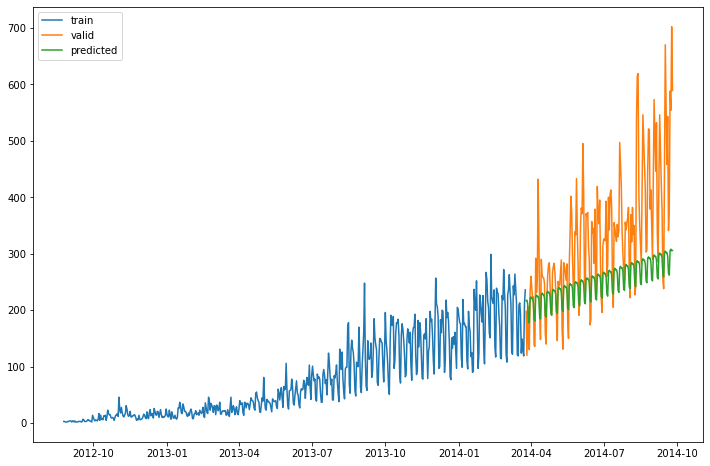

In [130]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [131]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['prophet']))
print('The RMSE value for Prophet is', rmse)

The RMSE value for Prophet is 118.18631808116592


# LSTM


In [141]:
df = pd.read_csv("C:\\Users\\Athul\\Downloads\\data\\train_data.csv",index_col='Date',parse_dates=True)


In [142]:
df.head()

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2
2012-08-28,2
2012-08-29,2


<AxesSubplot:xlabel='Date'>

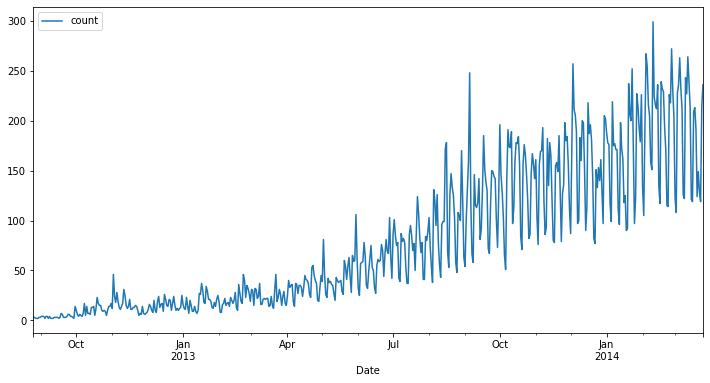

In [143]:
df.plot(figsize=(12,6))

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

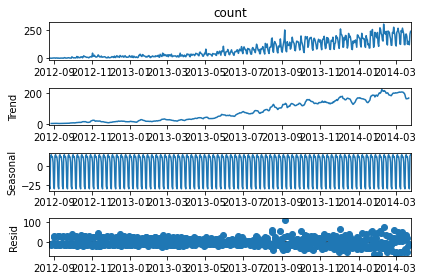

In [145]:
results = seasonal_decompose(df['count'])
results.plot();

In [146]:
len(df)

578

In [147]:
train = df.iloc[:520]
test = df.iloc[520:]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(),df.tail()

(            count
 Date             
 2012-08-25      3
 2012-08-26      3
 2012-08-27      2
 2012-08-28      2
 2012-08-29      2,
             count
 Date             
 2014-03-21    149
 2014-03-22    129
 2014-03-23    119
 2014-03-24    214
 2014-03-25    236)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:10]

array([[0.00392157],
       [0.00392157],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00392157],
       [0.00392157],
       [0.00784314],
       [0.00784314],
       [0.00784314]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)



In [18]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00392157 0.00392157 0.         0.         0.         0.00392157
 0.00392157 0.00784314 0.00784314 0.00784314 0.         0.00784314]
Predict this y: 
 [[0.00784314]]


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0046
Epoch 2/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0047
Epoch 3/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0047
Epoch 4/50
508/508 [==============================] - 5s 9ms/step - loss: 0.0047
Epoch 5/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0046
Epoch 6/50
508/508 [==============================] - 5s 9ms/step - loss: 0.0044
Epoch 7/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0046
Epoch 8/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0046
Epoch 9/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0047
Epoch 10/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0044
Epoch 11/50
508/508 [==============================] - 5s 9ms/step - loss: 0.0045
Epoch 12/50
508/508 [==============================] - 4s 9ms/step - loss: 0.0047
Epoch 13/50
508/508 [====

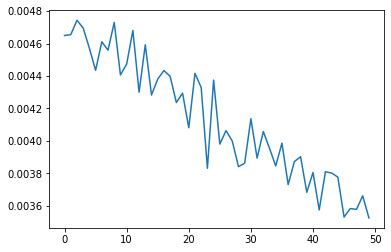

In [38]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [39]:
last_train_batch = scaled_train[-12:]

In [40]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [41]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 47ms/step


array([[0.8018484]], dtype=float32)

In [42]:
scaled_test[0]

array([0.88235294])

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 41ms/step


In [44]:
test_predictions

[array([0.8018484], dtype=float32),
 array([0.7662099], dtype=float32),
 array([0.76213807], dtype=float32),
 array([0.72832876], dtype=float32),
 array([0.6194546], dtype=float32),
 array([0.3990738], dtype=float32),
 array([0.4869539], dtype=float32),
 array([0.87073207], dtype=float32),
 array([0.8009265], dtype=float32),
 array([0.76021725], dtype=float32),
 array([0.73491573], dtype=float32),
 array([0.60338616], dtype=float32),
 array([0.3753168], dtype=float32),
 array([0.4890164], dtype=float32),
 array([0.86353606], dtype=float32),
 array([0.7711107], dtype=float32),
 array([0.7422685], dtype=float32),
 array([0.7180203], dtype=float32),
 array([0.57707006], dtype=float32),
 array([0.3702737], dtype=float32),
 array([0.51483065], dtype=float32),
 array([0.85791963], dtype=float32),
 array([0.77358127], dtype=float32),
 array([0.7424189], dtype=float32),
 array([0.7119981], dtype=float32),
 array([0.55757064], dtype=float32),
 array([0.36457676], dtype=float32),
 array([0.53744

In [45]:
test.head()

,count,Predictions
Date,,
2014-01-27,227,230.352577
2014-01-28,215,237.781498
2014-01-29,193,231.841778
2014-01-30,179,227.372321
2014-01-31,226,199.981096


In [46]:
true_predictions = scaler.inverse_transform(test_predictions)

In [47]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='Date'>

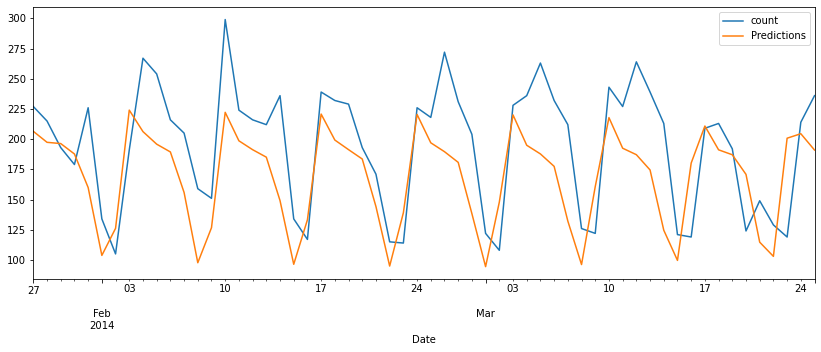

In [48]:
test.plot(figsize=(14,5))

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['count'],test['Predictions']))
print(rmse)

44.867792063131326
